## Linear Regression  to predict Olympic Medal count for top 25 countries
---

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

### Top 25 countries that won most medals
---

In [2]:
top_df = pd.read_csv('top_25.csv')
print(top_df.shape)
top_df.head()

(25, 9)


,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals
0,USA,4,10362,565,4341,1035,802,707,2544
1,Russia,1,6323,404,3191,592,498,487,1577
2,Germany,2,8471,510,3766,442,457,490,1389
3,UK,3,7634,525,3665,278,316,298,892
4,France,2,7023,540,3479,233,255,282,770


In [3]:
# Assigning Id to each Country
top_df['CountryId'] = [(x+1) for x in range(25)]

print(top_df.shape)
top_df.head()

(25, 10)


,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,CountryId
0,USA,4,10362,565,4341,1035,802,707,2544,1
1,Russia,1,6323,404,3191,592,498,487,1577,2
2,Germany,2,8471,510,3766,442,457,490,1389,3
3,UK,3,7634,525,3665,278,316,298,892,4
4,France,2,7023,540,3479,233,255,282,770,5


In [4]:
top_df = top_df[['Country', 'CountryId']]
print(top_df.shape)
top_df.head()

(25, 2)


,Country,CountryId
0,USA,1
1,Russia,2
2,Germany,3
3,UK,4
4,France,5


### Summer Olympic data with athlete, sports, events and medals count
---

In [5]:
df = pd.read_csv('summer_athlete_medals_count.csv')
print(df.shape)
df.head()

(2790, 10)


,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals
0,1896,Greece,1,102,9,39,10,17,17,44
1,1896,USA,0,14,3,16,11,6,2,19
2,1896,Germany,0,19,6,27,7,5,2,14
3,1896,France,0,12,6,18,5,4,2,11
4,1896,UK,0,10,7,19,3,3,3,9


In [6]:
# Adding country_id column to summer df
df = pd.merge(df,top_df, how = 'left', on = 'Country')
print(df.shape)
df.head()

(2790, 11)


,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,CountryId
0,1896,Greece,1,102,9,39,10,17,17,44,25.0
1,1896,USA,0,14,3,16,11,6,2,19,1.0
2,1896,Germany,0,19,6,27,7,5,2,14,3.0
3,1896,France,0,12,6,18,5,4,2,11,5.0
4,1896,UK,0,10,7,19,3,3,3,9,4.0


In [7]:
# Dropping the countries that are not in top 25
df = df.dropna()
print(df.shape)
df.head()

(634, 11)


,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,CountryId
0,1896,Greece,1,102,9,39,10,17,17,44,25.0
1,1896,USA,0,14,3,16,11,6,2,19,1.0
2,1896,Germany,0,19,6,27,7,5,2,14,3.0
3,1896,France,0,12,6,18,5,4,2,11,5.0
4,1896,UK,0,10,7,19,3,3,3,9,4.0


In [8]:
df['Athletes per sport'] = round(df['Athletes']/df['Sports'], 2)
print(df.shape)
df.head()

(634, 12)


,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,CountryId,Athletes per sport
0,1896,Greece,1,102,9,39,10,17,17,44,25.0,11.33
1,1896,USA,0,14,3,16,11,6,2,19,1.0,4.67
2,1896,Germany,0,19,6,27,7,5,2,14,3.0,3.17
3,1896,France,0,12,6,18,5,4,2,11,5.0,2.00
4,1896,UK,0,10,7,19,3,3,3,9,4.0,1.43


In [9]:
# Bring 'CountryId' column to the front
col = df.pop('CountryId')
df.insert(0,'CountryId', col)

print(df.shape)
df.head()

(634, 12)


,CountryId,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,Athletes per sport
0,25.0,1896,Greece,1,102,9,39,10,17,17,44,11.33
1,1.0,1896,USA,0,14,3,16,11,6,2,19,4.67
2,3.0,1896,Germany,0,19,6,27,7,5,2,14,3.17
3,5.0,1896,France,0,12,6,18,5,4,2,11,2.00
4,4.0,1896,UK,0,10,7,19,3,3,3,9,1.43


In [10]:
df = df.sort_values(['Year', 'Medals', 'Country'], ascending = [True, False, True])
print(df.shape)
df.head()

(634, 12)


,CountryId,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,Athletes per sport
0,25.0,1896,Greece,1,102,9,39,10,17,17,44,11.33
1,1.0,1896,USA,0,14,3,16,11,6,2,19,4.67
2,3.0,1896,Germany,0,19,6,27,7,5,2,14,3.17
3,5.0,1896,France,0,12,6,18,5,4,2,11,2.00
4,4.0,1896,UK,0,10,7,19,3,3,3,9,1.43


In [11]:
df = pd.get_dummies(df, columns = ['Country'])
print(df.shape)
df.head()

(634, 36)


,CountryId,Year,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,...,Country_Netherlands,Country_Norway,Country_Poland,Country_Romania,Country_Russia,Country_South Korea,Country_Sweden,Country_Switzerland,Country_UK,Country_USA
0,25.0,1896,1,102,9,39,10,17,17,44,...,False,False,False,False,False,False,False,False,False,False
1,1.0,1896,0,14,3,16,11,6,2,19,...,False,False,False,False,False,False,False,False,False,True
2,3.0,1896,0,19,6,27,7,5,2,14,...,False,False,False,False,False,False,False,False,False,False
3,5.0,1896,0,12,6,18,5,4,2,11,...,False,False,False,False,False,False,False,False,False,False
4,4.0,1896,0,10,7,19,3,3,3,9,...,False,False,False,False,False,False,False,False,True,False


## Predicting medals for 2004
---

In [12]:
predict_year = 2004

#### Train data
---

In [13]:
train_df = df[df['Year'] < predict_year]
print(train_df.shape)
train_df.head()

(534, 36)


,CountryId,Year,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,...,Country_Netherlands,Country_Norway,Country_Poland,Country_Romania,Country_Russia,Country_South Korea,Country_Sweden,Country_Switzerland,Country_UK,Country_USA
0,25.0,1896,1,102,9,39,10,17,17,44,...,False,False,False,False,False,False,False,False,False,False
1,1.0,1896,0,14,3,16,11,6,2,19,...,False,False,False,False,False,False,False,False,False,True
2,3.0,1896,0,19,6,27,7,5,2,14,...,False,False,False,False,False,False,False,False,False,False
3,5.0,1896,0,12,6,18,5,4,2,11,...,False,False,False,False,False,False,False,False,False,False
4,4.0,1896,0,10,7,19,3,3,3,9,...,False,False,False,False,False,False,False,False,True,False


In [14]:
X = train_df.drop(['Gold', 'Silver', 'Bronze', 'Medals'], axis=1)

y1 = train_df['Gold'].values.reshape(-1, 1)
y2 = train_df['Silver'].values.reshape(-1, 1)
y3 = train_df['Bronze'].values.reshape(-1, 1)
y4 = train_df['Medals'].values.reshape(-1, 1)

print(X.shape, y1.shape, y2.shape, y3.shape, y4.shape)

(534, 32) (534, 1) (534, 1) (534, 1) (534, 1)


#### Test data
---

In [15]:
test_df = df[df['Year'] == predict_year].sort_values(['CountryId'])
print(test_df.shape)
test_df.head()

(25, 36)


,CountryId,Year,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,...,Country_Netherlands,Country_Norway,Country_Poland,Country_Romania,Country_Russia,Country_South Korea,Country_Sweden,Country_Switzerland,Country_UK,Country_USA
1977,1.0,2004,0,533,31,254,36,39,26,101,...,False,False,False,False,False,False,False,False,False,True
1978,2.0,2004,0,446,29,235,28,26,36,90,...,False,False,False,False,True,False,False,False,False,False
1981,3.0,2004,0,441,29,228,13,16,20,49,...,False,False,False,False,False,False,False,False,False,False
1986,4.0,2004,0,264,24,162,9,9,12,30,...,False,False,False,False,False,False,False,False,True,False
1983,5.0,2004,0,308,27,193,11,9,13,33,...,False,False,False,False,False,False,False,False,False,False


In [16]:
test_data = test_df.drop(['Gold', 'Silver', 'Bronze', 'Medals'], axis = 1).reset_index(drop=True)
print(test_data.shape)
test_data.head()

(25, 32)


,CountryId,Year,Host,Athletes,Sports,Events,Athletes per sport,Country_Australia,Country_Belgium,Country_Bulgaria,...,Country_Netherlands,Country_Norway,Country_Poland,Country_Romania,Country_Russia,Country_South Korea,Country_Sweden,Country_Switzerland,Country_UK,Country_USA
0,1.0,2004,0,533,31,254,17.19,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2.0,2004,0,446,29,235,15.38,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,3.0,2004,0,441,29,228,15.21,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4.0,2004,0,264,24,162,11.00,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,5.0,2004,0,308,27,193,11.41,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
top_df['Gold Actual'] = test_df['Gold'].reset_index(drop=True)
top_df['Silver Actual'] = test_df['Silver'].reset_index(drop=True)
top_df['Bronze Actual'] = test_df['Bronze'].reset_index(drop=True)
top_df['Total Medals Actual'] = test_df['Medals'].reset_index(drop=True)

print(top_df.shape)
top_df.head()

(25, 6)


,Country,CountryId,Gold Actual,Silver Actual,Bronze Actual,Total Medals Actual
0,USA,1,36,39,26,101
1,Russia,2,28,26,36,90
2,Germany,3,13,16,20,49
3,UK,4,9,9,12,30
4,France,5,11,9,13,33


### Test Train Split & Standard Scaler
---

In [18]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

# Gold
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, random_state=2)

# Silver
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, random_state=2)

# Bronze
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, random_state=2)

# Total Medals
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y4, random_state=2)

In [19]:
print(X1_train.shape, y1_train.shape, X1_test.shape,  y1_test.shape)
print(X2_train.shape, y2_train.shape, X2_test.shape,  y2_test.shape)
print(X3_train.shape, y3_train.shape, X3_test.shape,  y3_test.shape)
print(X4_train.shape, y4_train.shape, X4_test.shape,  y4_test.shape)

(400, 32) (400, 1) (134, 32) (134, 1)
(400, 32) (400, 1) (134, 32) (134, 1)
(400, 32) (400, 1) (134, 32) (134, 1)
(400, 32) (400, 1) (134, 32) (134, 1)


## Linear Regression Model
---

In [20]:
from sklearn.linear_model import LinearRegression

### Gold
---

In [21]:
model1 = LinearRegression()

model1.fit(X1_train, y1_train)

training_score1 = model1.score(X1_train, y1_train)
testing_score1 = model1.score(X1_test, y1_test)

print('Gold Medals:')
print(f"Gold Training Score: {training_score1}")
print(f"Gold Testing Score: {testing_score1}")

Gold Medals:
Gold Training Score: 0.7566261230844246
Gold Testing Score: 0.8033871526014918


### Silver
---

In [22]:
model2 = LinearRegression()

model2.fit(X2_train, y2_train)

training_score2 = model1.score(X2_train, y2_train)
testing_score2 = model1.score(X2_test, y2_test)

print('Silver Medals:')
print(f"Silver Training Score: {training_score2}")
print(f"Silver Testing Score: {testing_score2}")

Silver Medals:
Silver Training Score: 0.7130476889843038
Silver Testing Score: 0.6801236187771572


### Bronze
---

In [23]:
model3 = LinearRegression()

model3.fit(X3_train, y3_train)

training_score3 = model3.score(X3_train, y3_train)
testing_score3 = model3.score(X3_test, y3_test)

print('Bronze Medals:')
print(f"Bronze Training Score: {training_score3}")
print(f"Bronze Testing Score: {testing_score3}")

Bronze Medals:
Bronze Training Score: 0.764683291966198
Bronze Testing Score: 0.7986679125362186


### Total Medals
---

In [24]:
model4 = LinearRegression()

model4.fit(X4_train, y4_train)

training_score4 = model4.score(X4_train, y4_train)
testing_score4 = model4.score(X4_test, y4_test)

print('Total Medals Medals:')
print(f"Total Medals Training Score: {training_score4}")
print(f"Total Medals Testing Score: {testing_score4}")

Total Medals Medals:
Total Medals Training Score: 0.7975235635466988
Total Medals Testing Score: 0.8624847216009098


### Using the models to predict medals for test_data
---

In [25]:
gold_predictions = model1.predict(test_data)
gold_predictions = np.ravel(gold_predictions)
gold_predictions = np.around(gold_predictions, decimals =0).astype(int)

gold_predictions

array([44, 36, 21,  6,  9, 16, 18, 18,  3,  9, 10,  2,  5,  3,  5,  4,  8,
        1,  4,  1,  1,  2, -1,  1, 18])

In [26]:
silver_predictions = model2.predict(test_data)
silver_predictions = np.ravel(silver_predictions)
silver_predictions = np.around(silver_predictions, decimals =0).astype(int)

silver_predictions

array([33, 29, 21,  7,  8, 13, 17, 18,  4,  7, 10,  1,  6,  3,  5,  5,  8,
        3,  3,  2,  1,  2, -1,  0, 19])

In [27]:
bronze_predictions = model3.predict(test_data)
bronze_predictions = np.ravel(bronze_predictions)
bronze_predictions = np.around(bronze_predictions, decimals =0).astype(int)

bronze_predictions

array([30, 27, 23,  8, 10, 13, 16, 18,  3,  9, 10,  2,  6,  5,  6,  6,  8,
        2,  3,  1,  0,  2, -1,  0, 15])

In [28]:
total_medals_predictions = model4.predict(test_data)
total_medals_predictions = np.ravel(total_medals_predictions)
total_medals_predictions = np.around(total_medals_predictions, decimals =0).astype(int)

total_medals_predictions

array([107,  92,  64,  21,  27,  42,  51,  54,  10,  24,  30,   5,  18,
        11,  16,  16,  23,   6,  10,   4,   3,   5,  -3,   1,  52])

### Creating a Dataframe to show all the predictions
---

In [29]:
top_df['Gold Predicted'] = gold_predictions
top_df['Silver Predicted'] = silver_predictions
top_df['Bronze Predicted'] = bronze_predictions

top_df['Total Medals Predicted'] = total_medals_predictions

top_df['Total Medals Predicted 2'] = top_df['Gold Predicted'] + top_df['Silver Predicted'] + top_df['Silver Predicted']

top_df

,Country,CountryId,Gold Actual,Silver Actual,Bronze Actual,Total Medals Actual,Gold Predicted,Silver Predicted,Bronze Predicted,Total Medals Predicted,Total Medals Predicted 2
0,USA,1,36,39,26,101,44,33,30,107,110
1,Russia,2,28,26,36,90,36,29,27,92,94
2,Germany,3,13,16,20,49,21,21,23,64,63
3,UK,4,9,9,12,30,6,7,8,21,20
4,France,5,11,9,13,33,9,8,10,27,25
5,Italy,6,10,11,11,32,16,13,13,42,42
6,China,7,32,18,14,64,18,17,16,51,52
7,Australia,8,17,16,17,50,18,18,18,54,54
8,Sweden,9,4,2,1,7,3,4,3,10,11
9,Hungary,10,8,6,3,17,9,7,9,24,23


In [30]:
# Rearranging the columns
top_df = top_df[['Country',\
                 'Gold Actual', 'Gold Predicted',\
                 'Silver Actual','Silver Predicted',\
                 'Bronze Actual', 'Bronze Predicted',\
                 'Total Medals Actual', 'Total Medals Predicted', 'Total Medals Predicted 2' ]]
top_df

,Country,Gold Actual,Gold Predicted,Silver Actual,Silver Predicted,Bronze Actual,Bronze Predicted,Total Medals Actual,Total Medals Predicted,Total Medals Predicted 2
0,USA,36,44,39,33,26,30,101,107,110
1,Russia,28,36,26,29,36,27,90,92,94
2,Germany,13,21,16,21,20,23,49,64,63
3,UK,9,6,9,7,12,8,30,21,20
4,France,11,9,9,8,13,10,33,27,25
5,Italy,10,16,11,13,11,13,32,42,42
6,China,32,18,18,17,14,16,64,51,52
7,Australia,17,18,16,18,17,18,50,54,54
8,Sweden,4,3,2,4,1,3,7,10,11
9,Hungary,8,9,6,7,3,9,17,24,23


In [31]:
top_df.to_csv('Predictions-2004.csv', index = False)

### Plot Residuals
---

### plot for actual medal count and model predictions
---

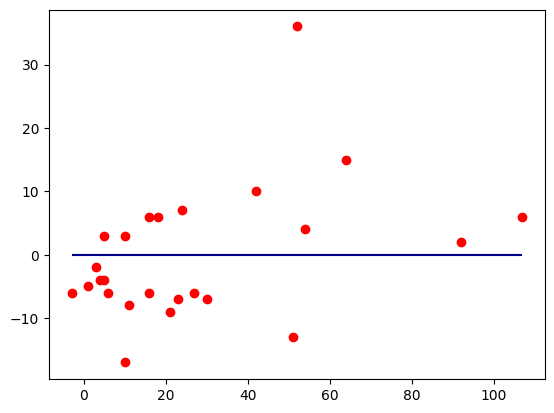

In [32]:
y = top_df['Total Medals Actual']

plt.scatter(total_medals_predictions,
            total_medals_predictions - y,
            c = 'red')

plt.hlines(y=0,
           xmin=total_medals_predictions.min(),
           xmax=total_medals_predictions.max(),
           colors ="darkblue")

plt.show()

### plot for actual medal count and (gold+silver+bronze) predictions
---

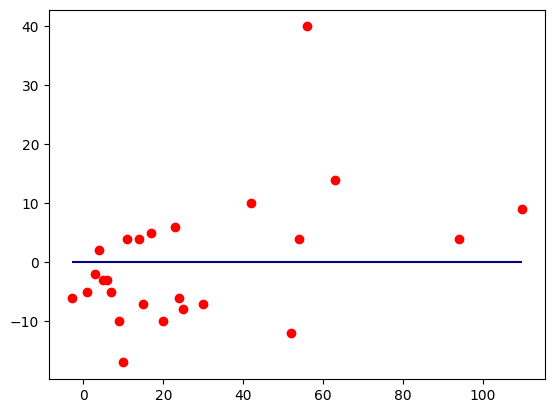

In [33]:
y = top_df['Total Medals Actual']

plt.scatter(top_df['Total Medals Predicted 2'],\
            top_df['Total Medals Predicted 2'] - y,
            c = 'red')

plt.hlines(y=0, xmin=top_df['Total Medals Predicted 2'].min(),\
           xmax=top_df['Total Medals Predicted 2'].max(),\
           colors ="darkblue")

plt.show()

In [34]:
from sklearn.metrics import mean_squared_error

MSE1 = mean_squared_error(top_df['Total Medals Actual'], top_df['Total Medals Predicted'])
MSE2 = mean_squared_error(top_df['Total Medals Actual'], top_df['Total Medals Predicted 2'])

gold_r2 = model1.score(X1_test, y1_test)
silver_r2 = model2.score(X2_test, y2_test)
bronze_r2 = model3.score(X3_test, y3_test)
total_r2 = model4.score(X4_test, y4_test)


print(f"MSE1: {MSE1}, MSE2: {MSE2}\nGold R2: {gold_r2},\nSilver R2: {silver_r2},\nBronze R2: {bronze_r2},\nTotal Medals R2: {total_r2}")

MSE1: 108.88, MSE2: 121.8
Gold R2: 0.8033871526014918,
Silver R2: 0.7920862317645283,
Bronze R2: 0.7986679125362186,
Total Medals R2: 0.8624847216009098
